In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

##### Handling the outliers

In [4]:
df['bmi'] = df['bmi'].apply(lambda x: 47 if x > 47 else x)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: 170 if x > 170 else x)

#### Handling the null values for BMI  

In [5]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,170.00,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,170.00,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,170.00,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,170.00,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
#based on the plot for bmi we can see that it is not normally distributed so we will be filling in the missing values using 
#the medium
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,170.00,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,170.00,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,170.00,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,170.00,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Transform the variables that are an object datatype. ) 

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,170.00,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,170.00,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,170.00,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,170.00,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
le = LabelEncoder()

In [10]:
# so we use a for loop that starts at index 0 and we check the dtype of each column and if they are considered as an object
#then we let label encoder transform it which gives us our new table without any string columns
for i in df.columns[0:]:
    if(df[i].dtype == 'object'):
        df[i] = le.fit_transform(df[i])

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,170.00,36.6,1,1
1,0,61.0,0,0,1,3,0,170.00,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,170.00,34.4,3,1
4,0,79.0,1,0,1,3,0,170.00,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


##### Looking for best features to use and worst to drop

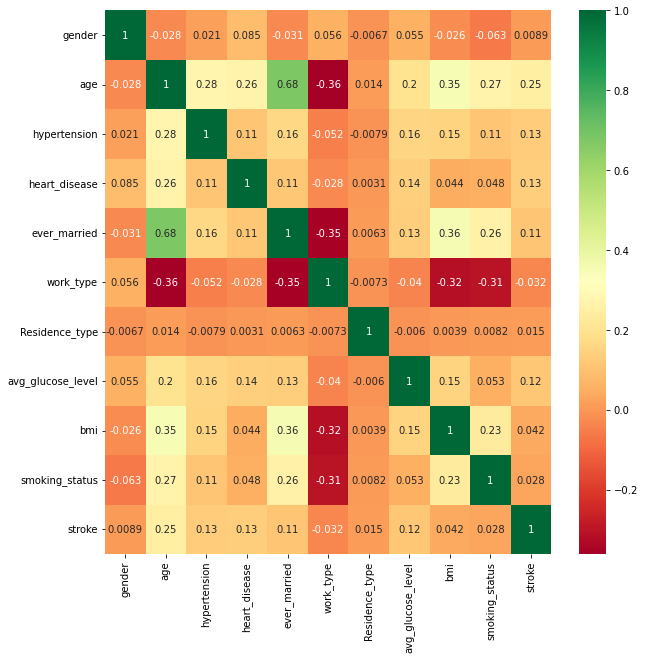

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [13]:
#x = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
#y = df[['stroke']]

In [14]:
#preparing the selectkbest
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(x,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(x.columns)
#creates a quick graph to show the features and their score
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Features','Score']

In [15]:
#featureScores

In [16]:
#print(featureScores.nlargest(8,'Score'))

In [17]:
df = df.drop(['gender'], axis = 1)
df = df.drop(['Residence_type'], axis = 1)
#df = df.drop(['work_type'], axis = 1)
#df = df.drop(['bmi'], axis = 1)

In [18]:
df[1:].corr()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
age,1.000000,0.276498,0.263415,0.679084,-0.361650,0.200173,0.349068,0.265303,0.244843
hypertension,0.276498,1.000000,0.108763,0.164300,-0.051772,0.157536,0.154312,0.111018,0.128435
heart_disease,0.263415,0.108763,1.000000,0.114253,-0.027945,0.138851,0.043105,0.048833,0.131772
ever_married,0.679084,0.164300,0.114253,1.000000,-0.352719,0.133540,0.355245,0.259714,0.107926
work_type,-0.361650,-0.051772,-0.027945,-0.352719,1.000000,-0.040445,-0.316391,-0.305942,-0.032245
avg_glucose_level,0.200173,0.157536,0.138851,0.133540,-0.040445,1.000000,0.151516,0.052895,0.114500
bmi,0.349068,0.154312,0.043105,0.355245,-0.316391,0.151516,1.000000,0.232986,0.041328
smoking_status,0.265303,0.111018,0.048833,0.259714,-0.305942,0.052895,0.232986,1.000000,0.028482
stroke,0.244843,0.128435,0.131772,0.107926,-0.032245,0.114500,0.041328,0.028482,1.000000


### Standarizing the data

In [19]:
scaler = StandardScaler().fit(df)
sD = scaler.transform(df)
sD = pd.DataFrame(sD, index=df.index,columns=df.columns)

### Splitting data into input and output

In [20]:
#removing gender and residecnetype worktype and bmi
x = sD[[ 'age', 'work_type', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'smoking_status']]
y = sD[['stroke']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [21]:
#Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to the data
scaler.fit(x)
# Transform the data using the scaler
x_norm = scaler.transform(x)

In [22]:
#x_norm

In [23]:
# Convert the normalized data back to a DataFrame
x_norm = pd.DataFrame(x_norm, columns=x.columns)

In [24]:
#lab = preprocessing.LabelEncoder()
#y_norm = lab.fit_transform(y.values.ravel())

In [25]:
#y_norm

In [26]:
#preparing the selectkbest
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(x_norm,y_norm)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(x_norm.columns)
#creates a quick graph to show the features and their score
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Features','Score']

In [27]:
#featureScores

### Normalizing the output y

In [28]:
lab = preprocessing.LabelEncoder()
y_transTrain = lab.fit_transform(y_train.values.ravel())
y_testNorm = lab.fit_transform(y_test.values.ravel())

### applying SMOTE

In [29]:
print("\n\t Pre oversampling, the shape of x_train:{}".format(x_train.shape))
print("\n\t Pre oversampling, the shape of y_train:{}".format(y_transTrain.shape))


	 Pre oversampling, the shape of x_train:(4088, 8)

	 Pre oversampling, the shape of y_train:(4088,)


In [30]:
print("Pre OverSampling, counts of label '1': {}".format(sum(y_train.values.ravel() == 1))) 
print("Pre OverSampling, counts of label '0': {}".format(sum(y_transTrain== 0)))

Pre OverSampling, counts of label '1': 0
Pre OverSampling, counts of label '0': 3893


In [31]:
sm = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state = 100)

In [32]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_transTrain)

In [33]:
print("\n\t Post oversampling, the shape of x_train_res:{}".format(x_train_res.shape))
print("\n\t Post oversampling, the shape of y_train_res:{}".format(y_train_res.shape))


	 Post oversampling, the shape of x_train_res:(5060, 8)

	 Post oversampling, the shape of y_train_res:(5060,)


In [34]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 1167
After OverSampling, counts of label '0': 3893


### Building a Logistic Regression Model Using Training Set 

In [35]:
model = LogisticRegression()

In [36]:
model.fit(x_train_res, y_train_res)

LogisticRegression()

#### Predicting accuracy score for testing data  and training to compare

In [37]:
ypredTest = model.predict(x_test)
accuracyTest = accuracy_score(y_testNorm, ypredTest)
print("accuracy for model on testing data is:", accuracyTest.round(2))

accuracy for model on testing data is: 0.87


In [38]:
# Make predictions on the training data
y_predTrain = model.predict(x_train_res)
accuracyTrain = accuracy_score(y_train_res, y_predTrain)
print("accuracy for model on testing data is:", accuracyTrain.round(2))

accuracy for model on testing data is: 0.81


### Building a Naive Bayes Model using the Training set

In [39]:
nb_model = GaussianNB()

In [40]:
nb_model.fit(x_train_res, y_train_res)

GaussianNB()

#### Predicting accuracy score for testing data  and training to compare

In [41]:
ypredTest2 = nb_model.predict(x_test)
accuracyTest2 = accuracy_score(y_testNorm, ypredTest2)
print("accuracy for model on testing data is:", accuracyTest2.round(2))

accuracy for model on testing data is: 0.83


In [42]:
# Make predictions on the training data
y_predTrain2 = nb_model.predict(x_train_res)
accuracyTrain2 = accuracy_score(y_train_res, y_predTrain2)
print("accuracy for model on testing data is:", accuracyTrain2.round(2))

accuracy for model on testing data is: 0.78


### Building a K-Nearest Neighbor Classifier model using Training Set 

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
# Train the model on the training data
knn.fit(x_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

#### Predicting accuracy score for testing data  and training to compare

In [45]:
# Make predictions on the testing data
y_predTest3 = knn.predict(x_test)
accuracyTest3 = accuracy_score(y_testNorm, y_predTest3)
print("accuracy for model on testing data is:", accuracyTest3.round(3))

accuracy for model on testing data is: 0.883


In [46]:
# Make predictions on the training data
y_predTrain3 = knn.predict(x_train_res)
accuracyTrain3 = accuracy_score(y_train_res, y_predTrain3)
print("accuracy for model on testing data is:", accuracyTrain3.round(3))

accuracy for model on testing data is: 0.952


### Build a  Support Vector Machine Classifier model using the training set.

In [47]:
svm = SVC()
# Train the model on the training data
svm.fit(x_train_res, y_train_res)


SVC()

#### Predicting accuracy score for testing data  and training to compare

In [48]:
# Make predictions on the testing data
y_predTest4 = svm.predict(x_test)
accuracyTest4 = accuracy_score(y_testNorm, y_predTest4)
print("accuracy for model on testing data is:", accuracyTest4.round(2))

accuracy for model on testing data is: 0.9


In [49]:
# Make predictions on the training data
y_predTrain4 = svm.predict(x_train_res)
accuracyTrain4 = accuracy_score(y_train_res, y_predTrain4)
print("accuracy for model on testing data is:", accuracyTrain4.round(2))

accuracy for model on testing data is: 0.85
